## Notebook for adjusting Nanopore class

What I want Nanopore to acheive: 
1. Plot all events, ln and not low noise
2. Plot one event 
3. Have either peaks labelled or no peaks
4. Count number of peaks for each 
5. Print out heights for peaks and time with each 

In [8]:
#from tara_analysis import Nanopore
#Class to read data set and tell you correponding peaks 
import numpy as np 
import matplotlib.pyplot as plt
import h5py     
from scipy.signal import find_peaks 
from scipy import stats
import os 
from matplotlib.widgets import TextBox



In [90]:

class Nanopore():
    def __init__(self, file):
        self.event_set = self.load_data(file)
        self.event_list =  self.event_set.keys()
        self.n_event = len(self.event_list)
        self.event_list_ln = []
        self.event_set_norm = self.event_set

        #properties for meassurement
        self.h=0.015
        self.t=-0.015
        self.d=25
        self.p=0.02 #adust down to detect smaller peaks
        self.w=1 #Required width of peaks in samples, adjust to get rid of some low prominence peaks
        self.wl=10 #ts rid of folds, go down

    def load_data(self, filefolder): #works
        filefolder=filefolder
        filepath = filefolder + "/"
        events_hdf5 = "events.hdf5"
        e_fp= filepath + events_hdf5 #events file path
        event_data=h5py.File(e_fp, 'r')
        return event_data

    def filter_noise(self, level = 0.02): #works
        event_ln = [] 
        for j in self.event_list:
            noise = self.event_set[j].attrs["rms_nA"]<level #filtering out noisy events
            if noise == True:
                event_ln.append(j)
        self.event_list_ln=event_ln #group keys for low noise events only 
        

    def peaks_one_event(self, event, h,t,d,p,w,wl): #works
        #Function to find peaks with corresponding values 
        current = self.event_set[event]['current_nA'][...]
        x= -1*current
        peaks, properties = find_peaks(x, height=h, threshold=t, distance=d, prominence=p, width=w, wlen=wl)
        properties['peaks'] = peaks
        return properties

    def plot_one_event(self, event, peaks=False, print_heights=False): #Works
        file = self.event_set[event]
        fig, ax = plt.subplots()
        fig.subplots_adjust(bottom=0.2)
        if peaks==False:
            properties = peaks_dict=self.peaks_one_event(event, self.h,self.t,self.d,self.p,self.w,self.wl )
            samplefreq_Hz = file.attrs["samplefreq_Hz"]
            current = file['current_nA'][...]
            x = np.arange(current.size) / samplefreq_Hz * 1000
            plt.style.use('default')
            ax.plot(x, current, color='black',linewidth=0.5)
            plt.title("Event: " + event)
            plt.xlabel('Time [ms]')
            plt.ylabel('Current Drop[nA]')
            if print_heights==True:
                axbox = fig.add_axes([0.1, -0.05, 0.9, 0.05])
                text_box = TextBox(axbox, "Number of Peaks", textalignment="left")
                text_box.set_val(len(properties['peaks']) ) # Trigger `submit` with the initial string.
        elif peaks==True: 
            properties = peaks_dict=self.peaks_one_event(event, self.h,self.t,self.d,self.p,self.w,self.wl )
            samplefreq_Hz = file.attrs["samplefreq_Hz"]
            current = file['current_nA'][...]
            y = np.arange(current.size) / samplefreq_Hz * 1000
            x= -1*current
            plt.style.use('default')
            ax.plot(y, -x, color='black',linewidth=0.5)
            ax.plot(peaks_dict['peaks']/ samplefreq_Hz * 1000, -x[peaks_dict['peaks'] ], 'x', color='red')
            plt.title("Event: " + event)
            plt.xlabel('Time [ms]')
            plt.ylabel('Current Drop[nA]')
            if print_heights==True:
                axbox = fig.add_axes([0.1, -0.05, 0.9, 0.05])
                text_box = TextBox(axbox, "Number of Peaks", textalignment="left")
                text_box.set_val(len(properties['peaks']) ) # Trigger `submit` with the initial string.
            
        show= plt.show()
        return show

    def plot_events(self, ln = False): #works'
        if ln ==False:
            file=self.event_set
            group_key = list(file.keys())
            for i in group_key[0:10]:
                self.plot_one_event(i, peaks=True, print_heights=True)
        elif ln ==True: 
            file=self.event_list_ln
            group_key = list(file)
            for i in group_key:
                self.plot_one_event(i, peaks=True, print_heights=True)
        return show

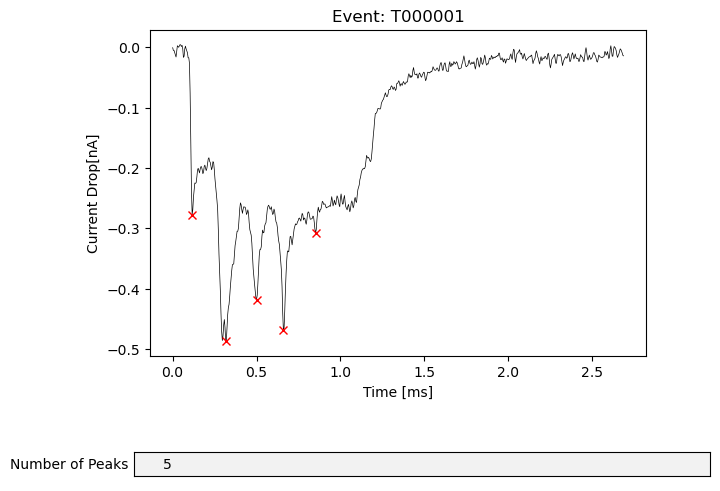

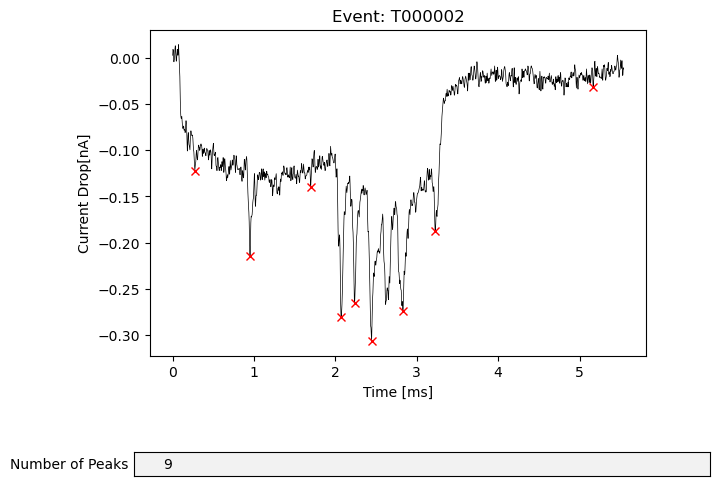

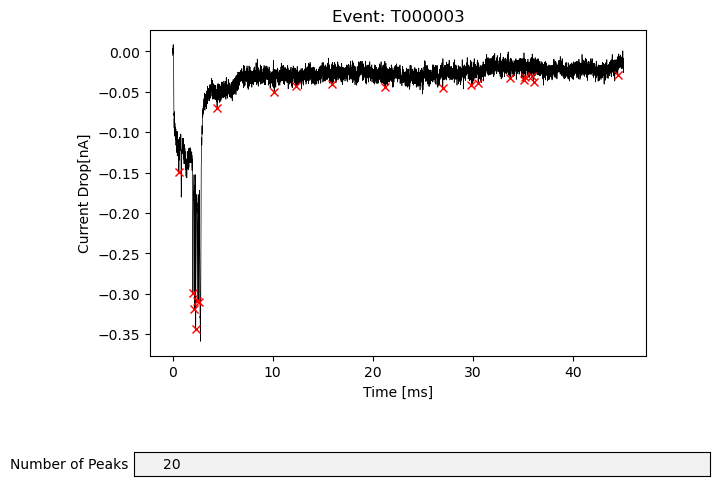

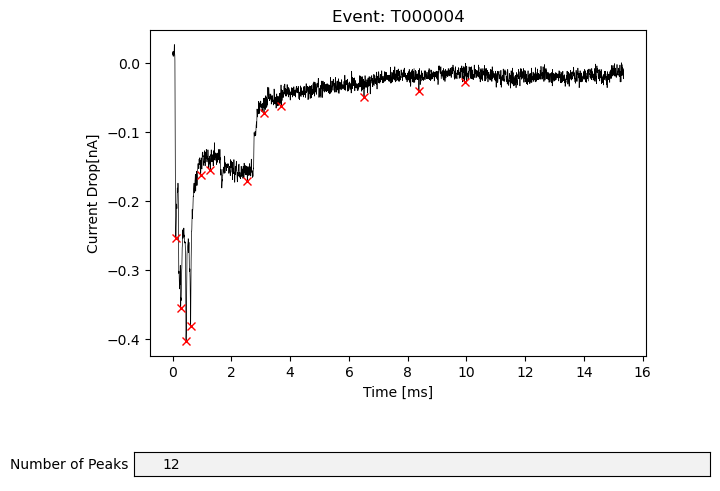

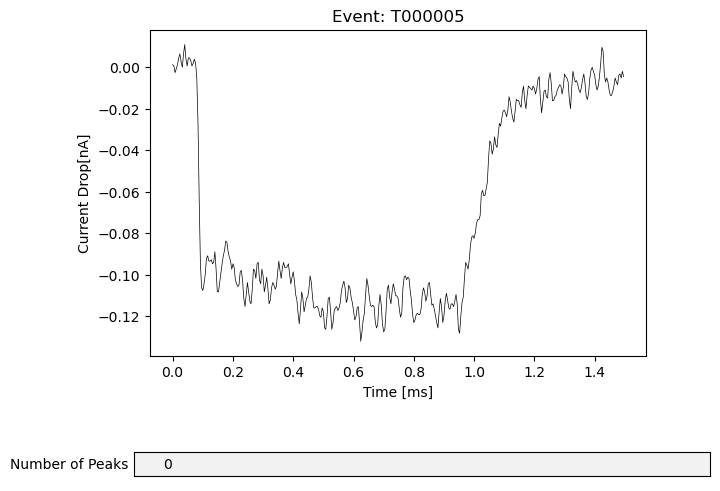

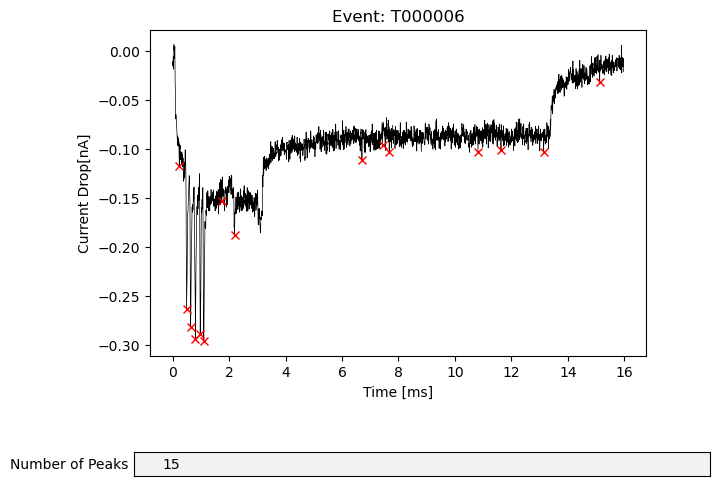

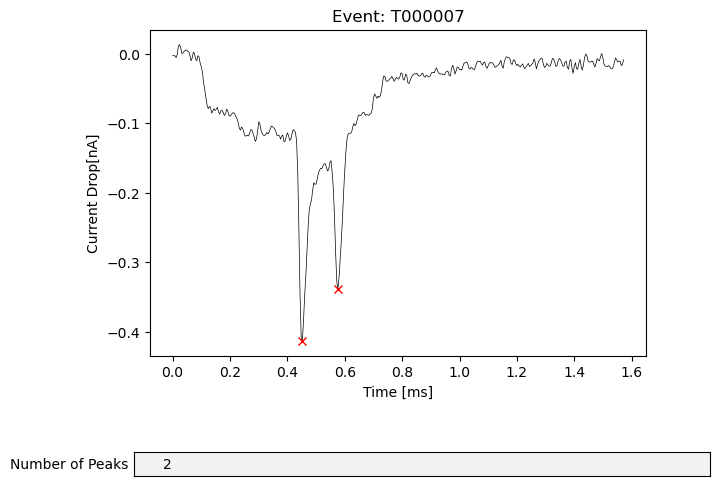

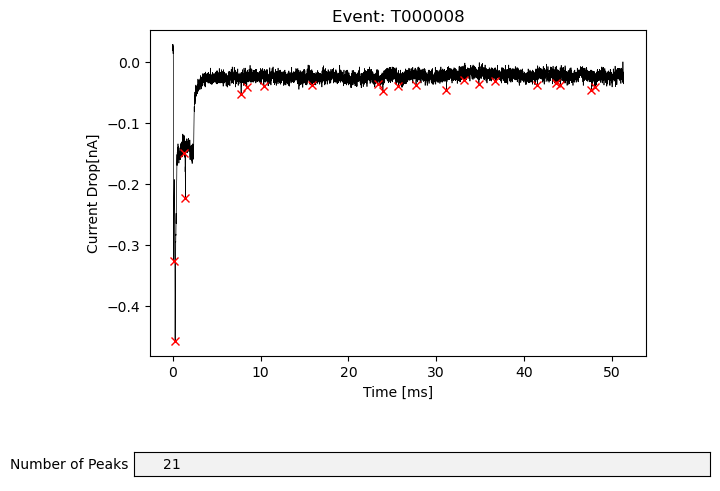

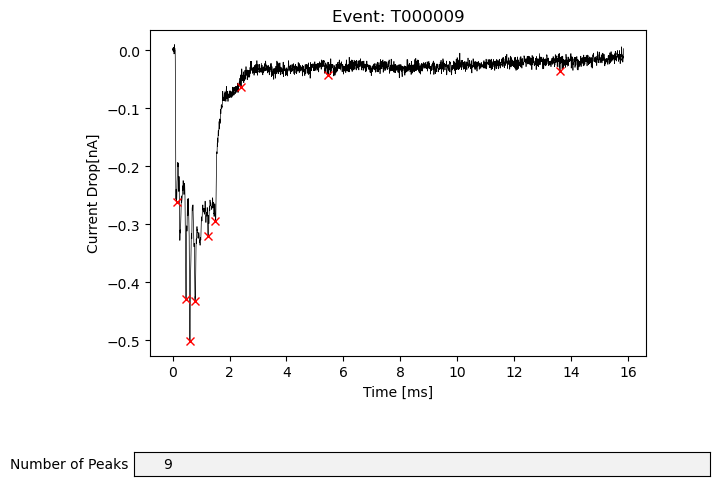

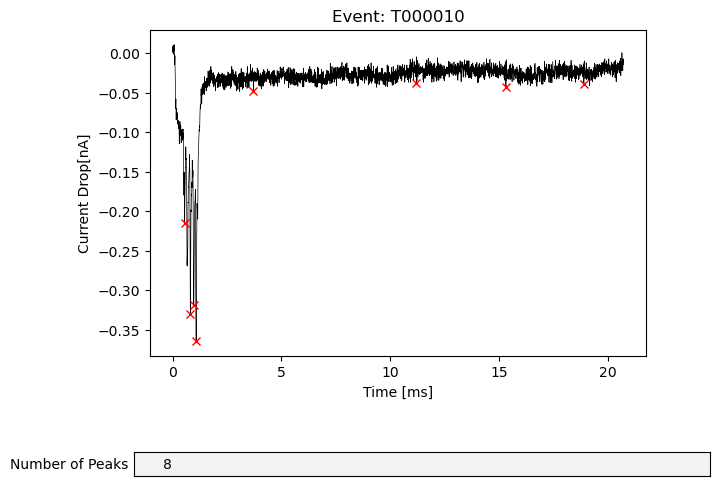

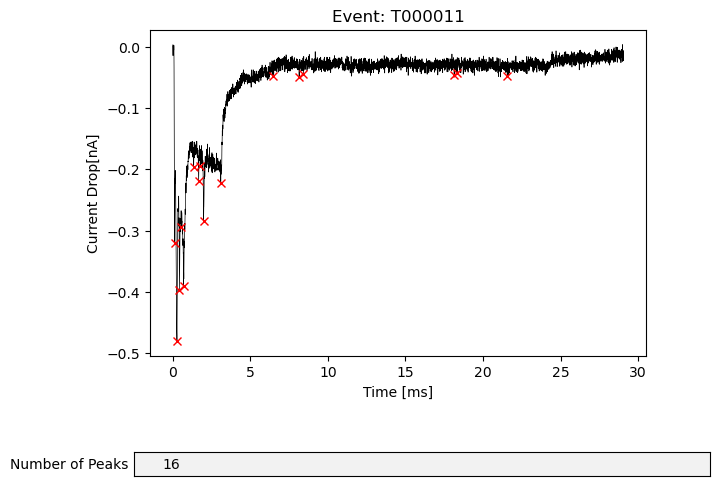

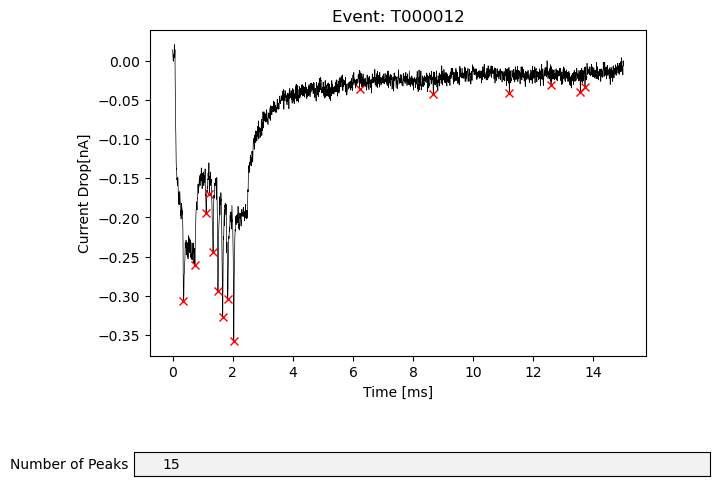

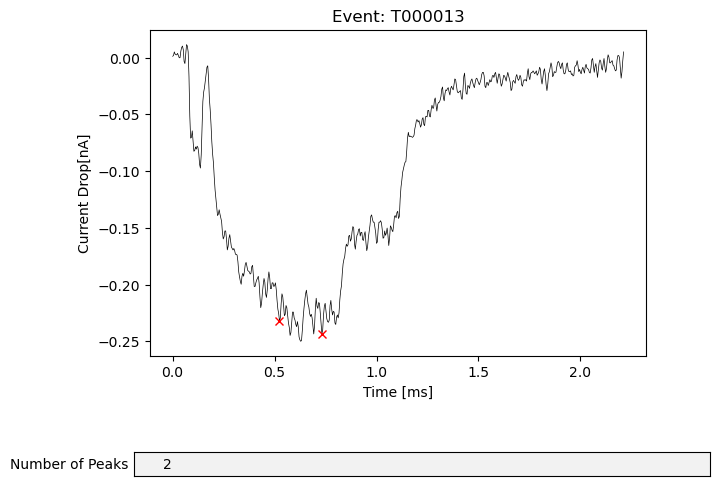

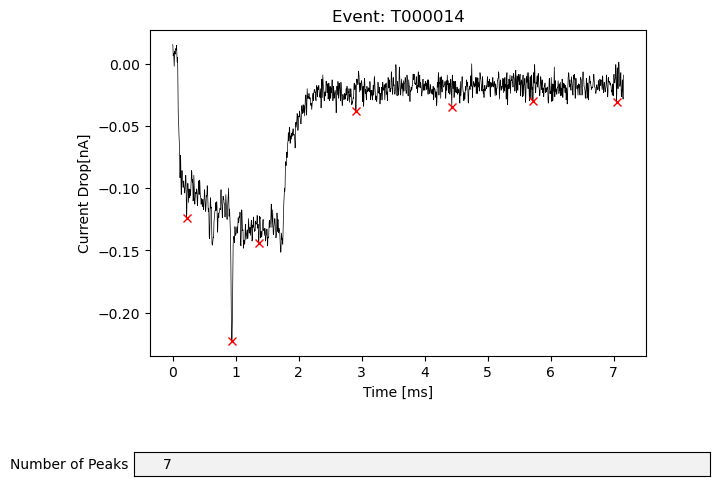

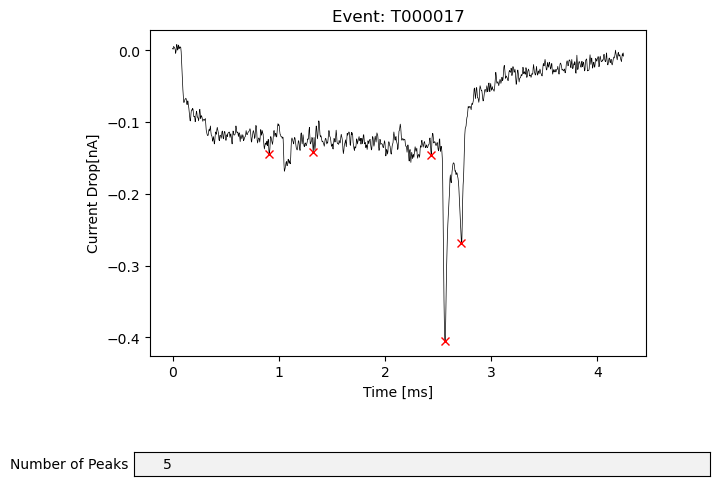

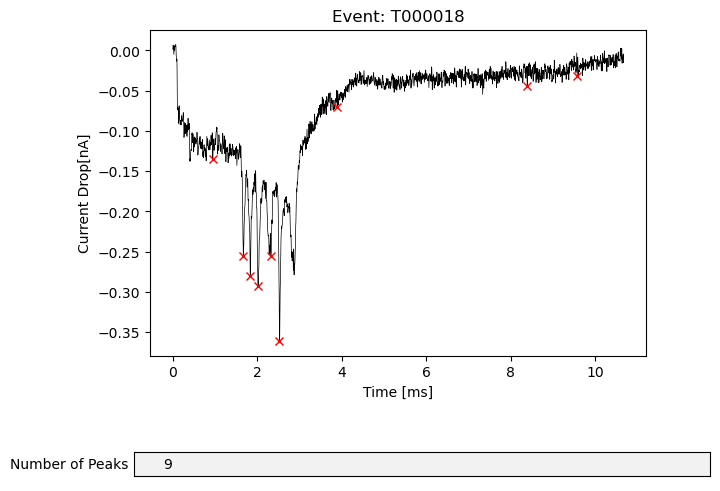

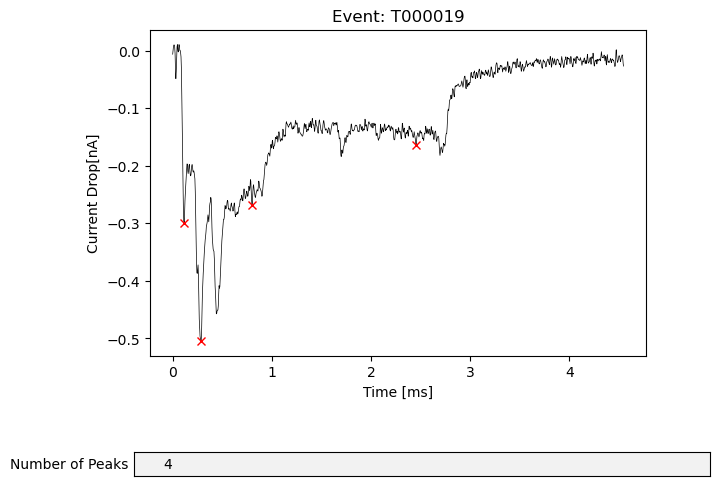

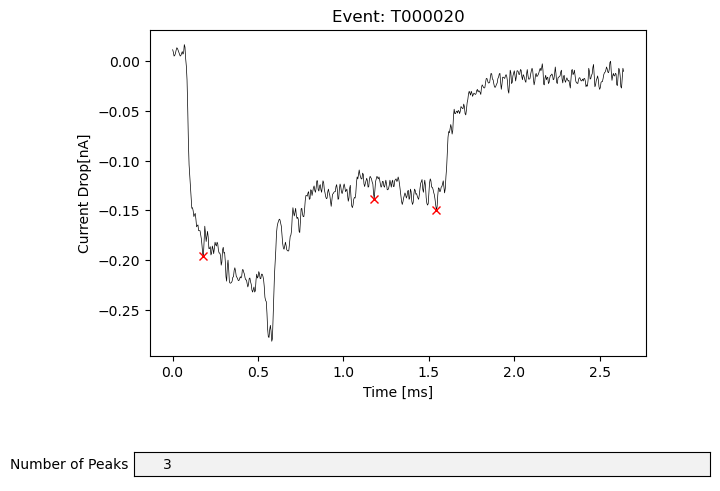

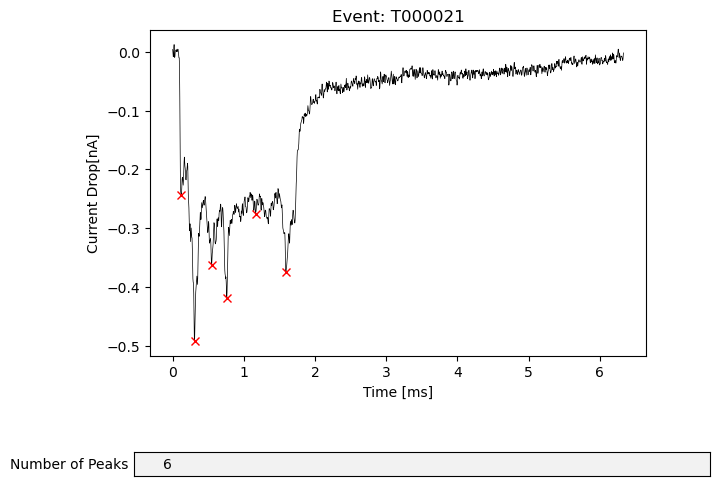

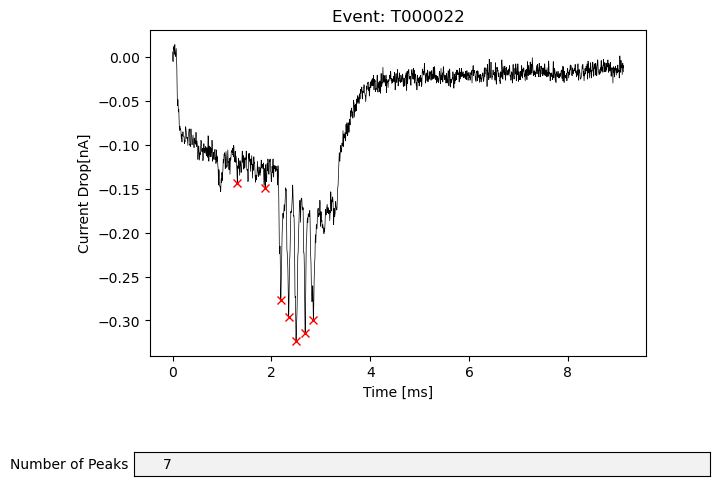

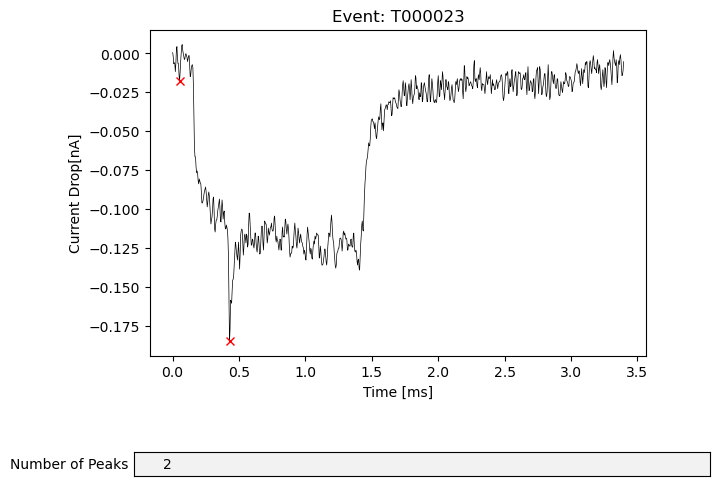

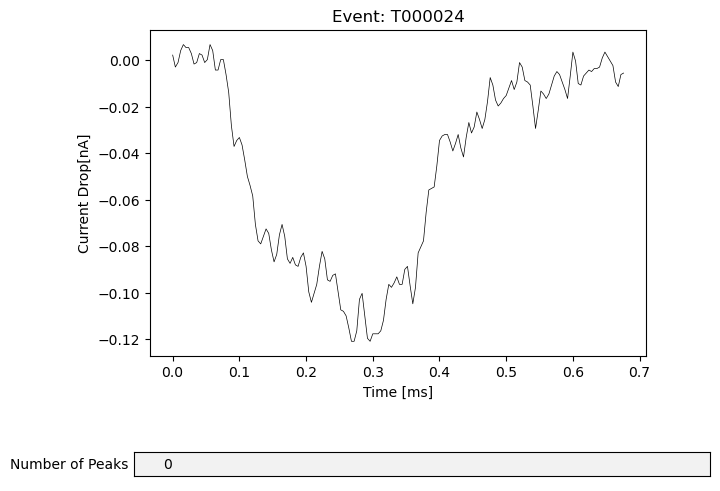

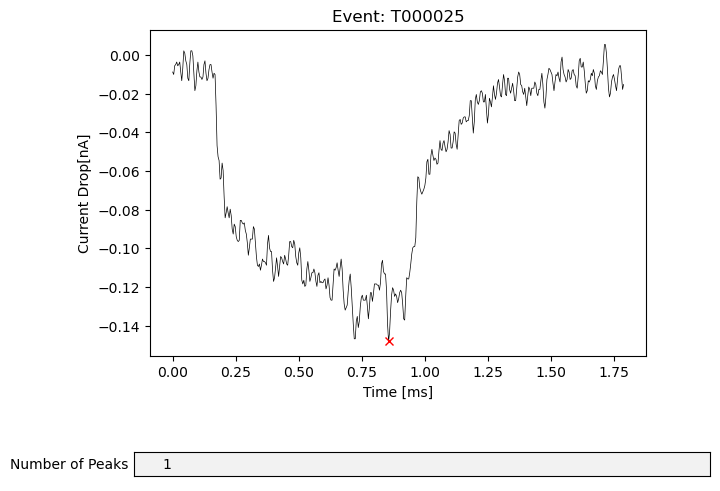

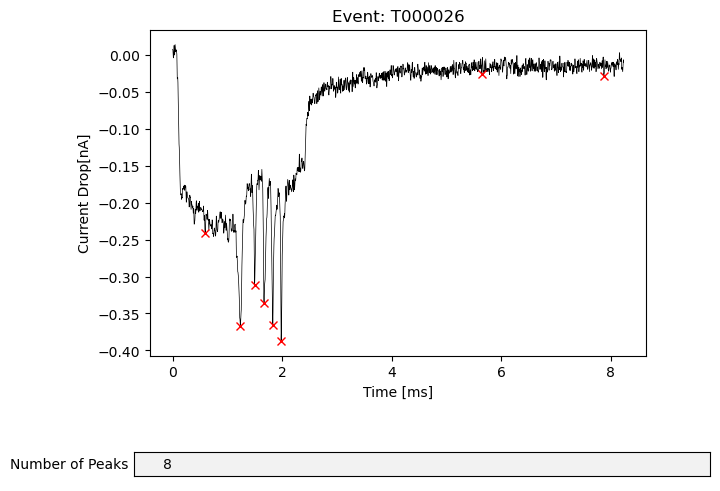

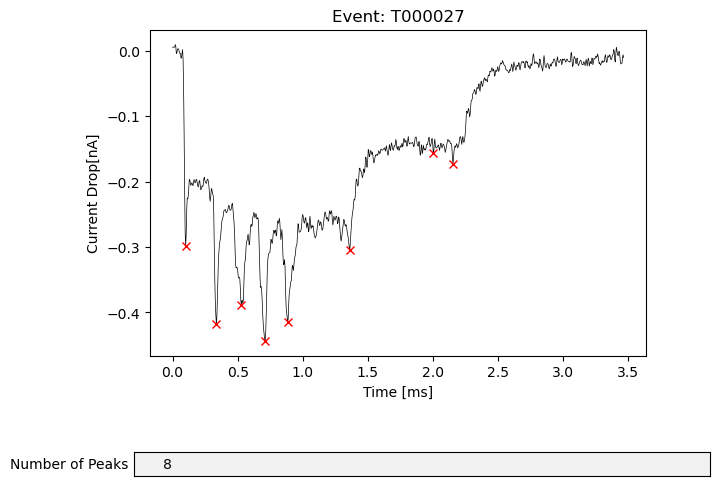

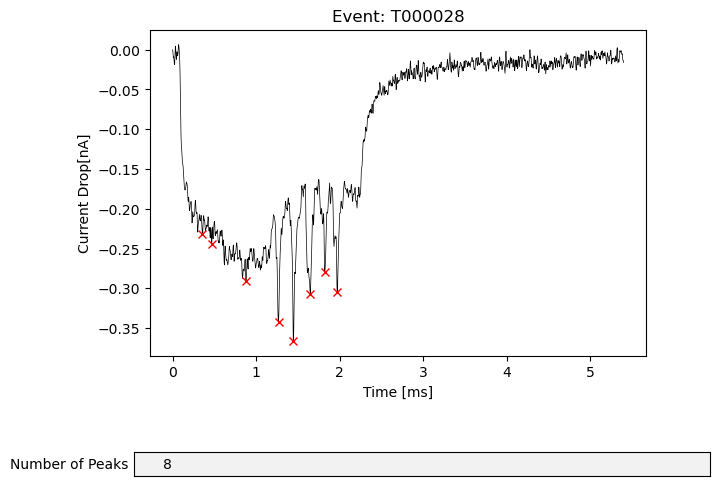

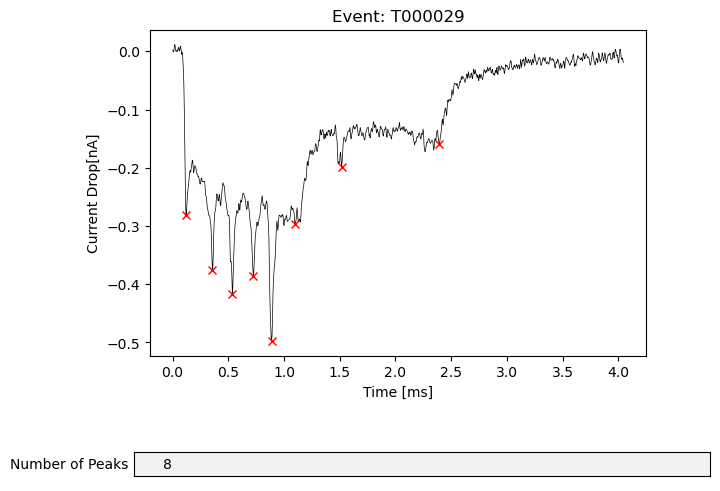

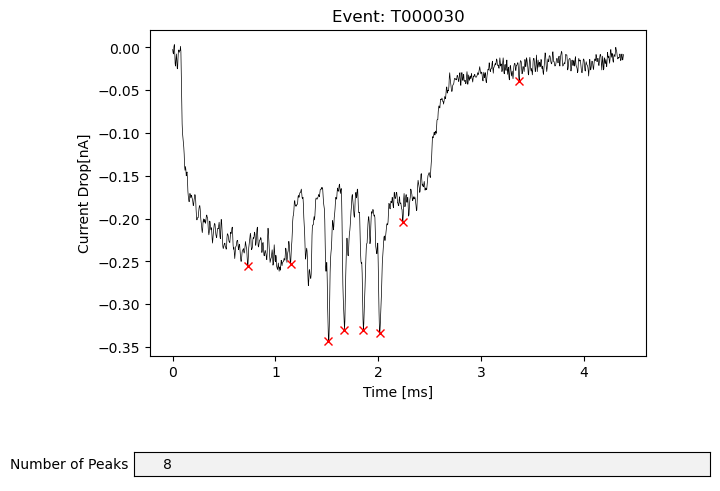

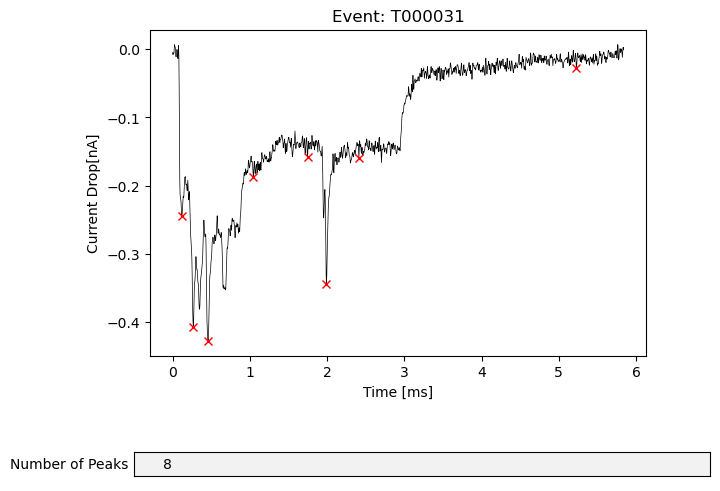

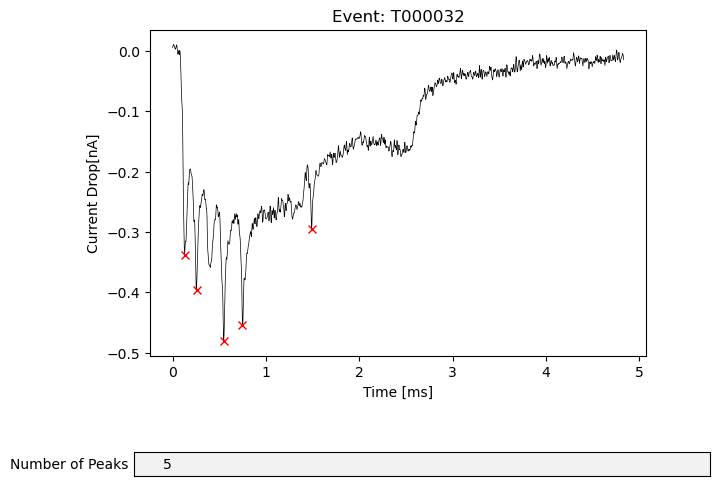

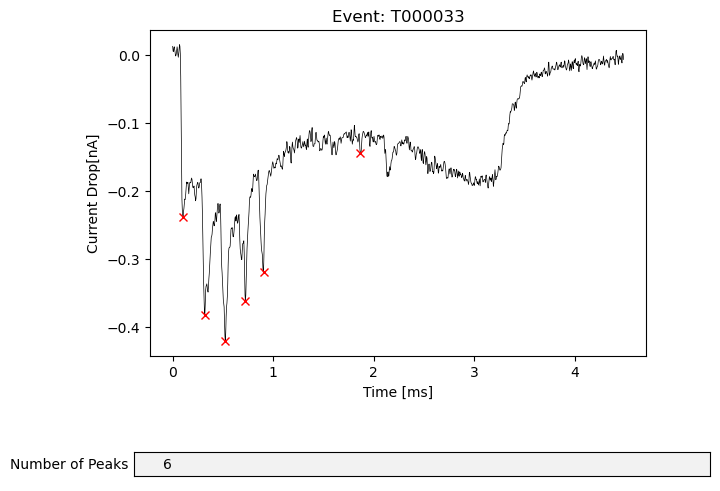

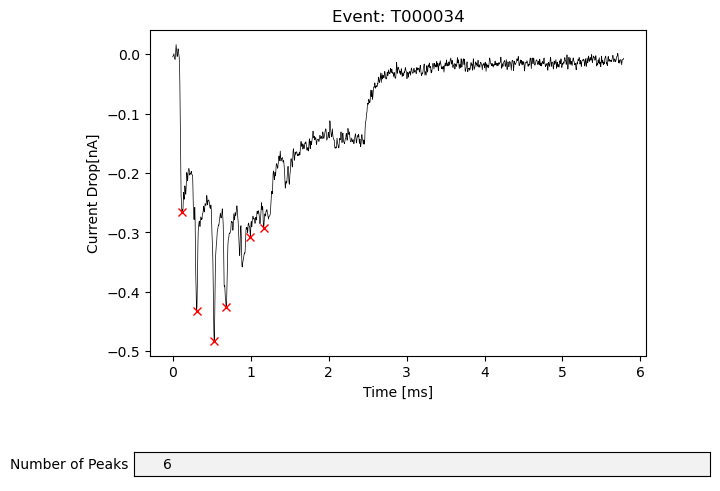

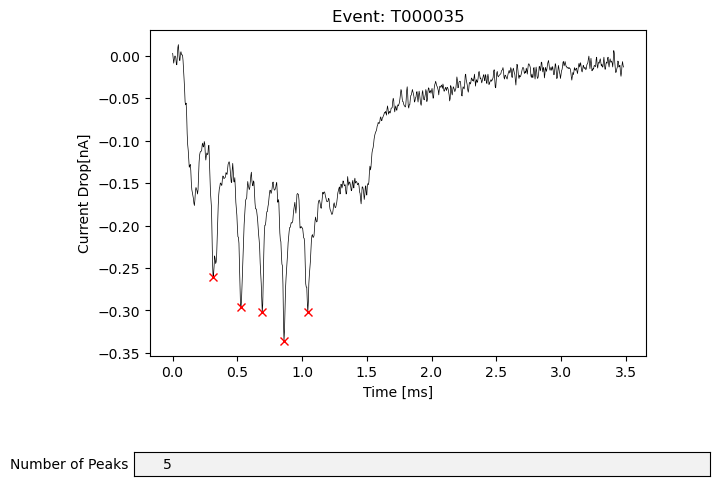

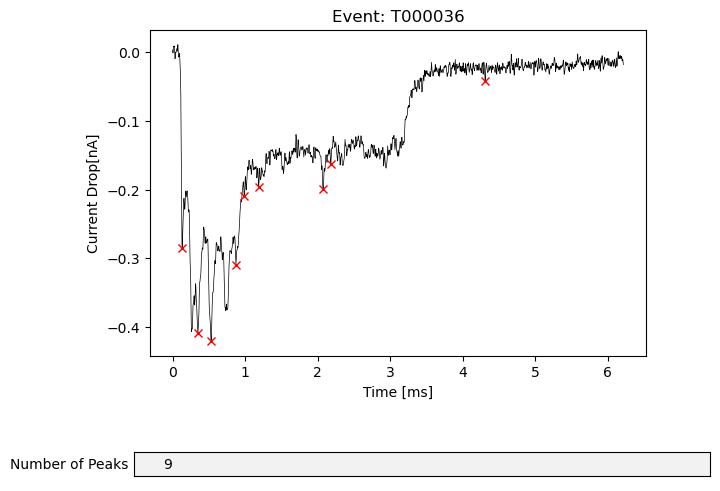

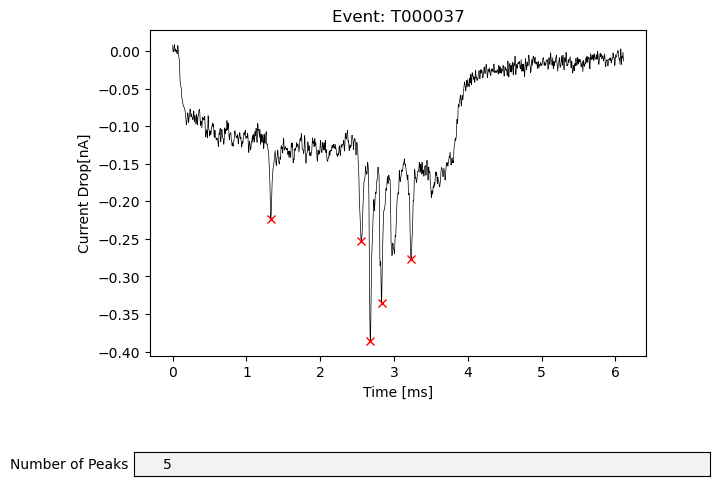

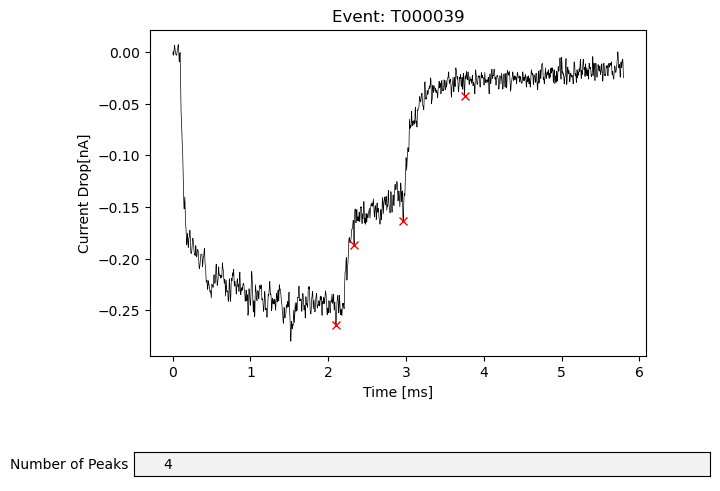

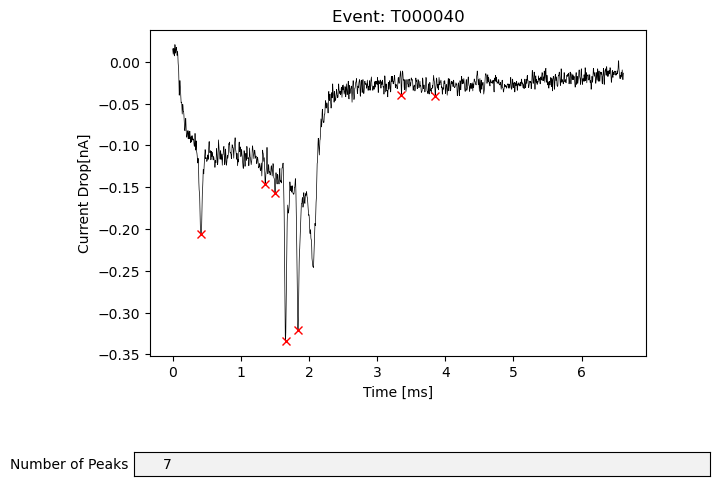

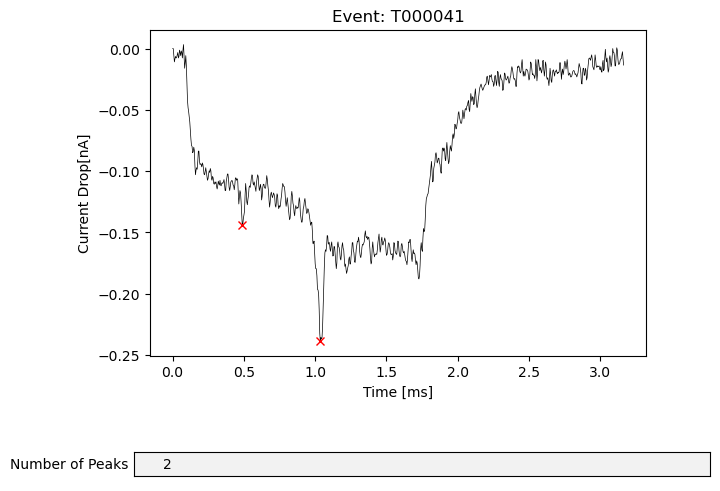

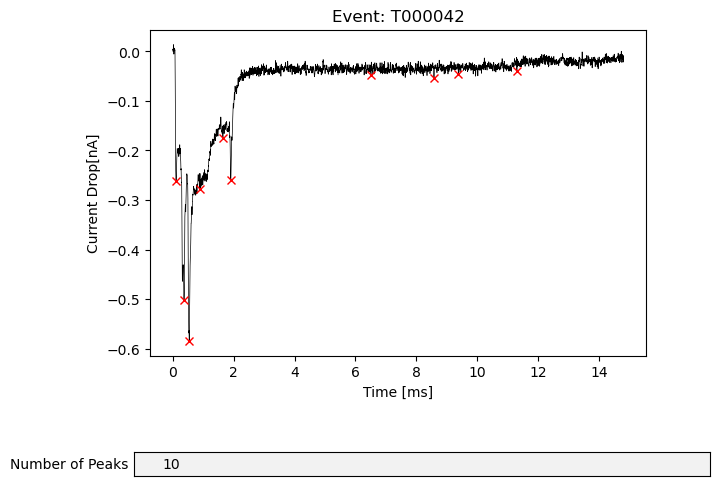

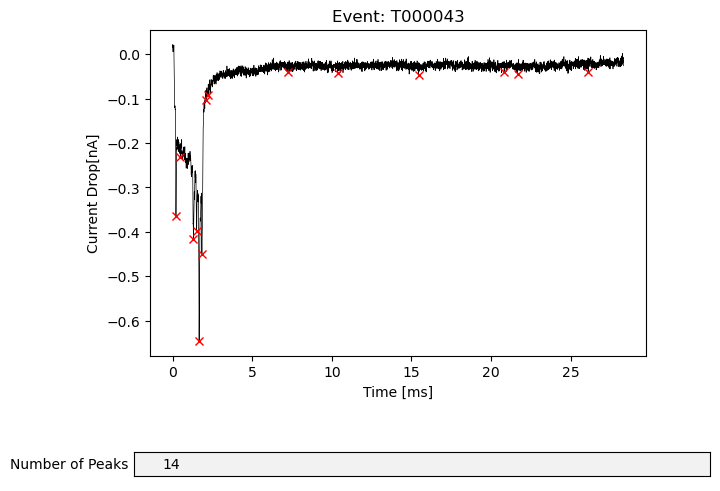

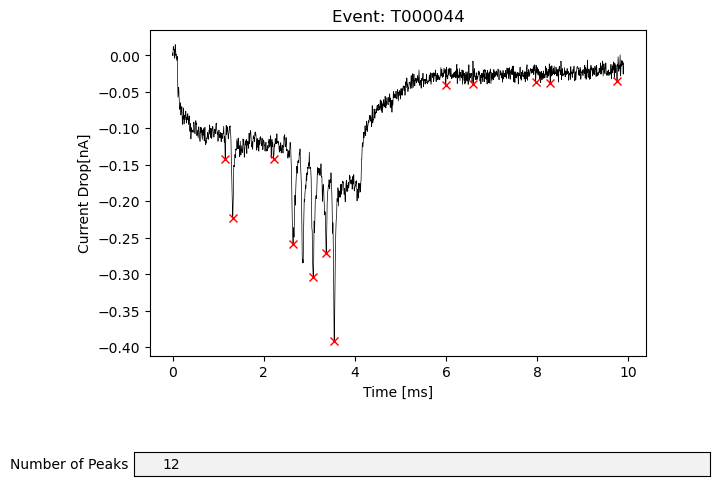

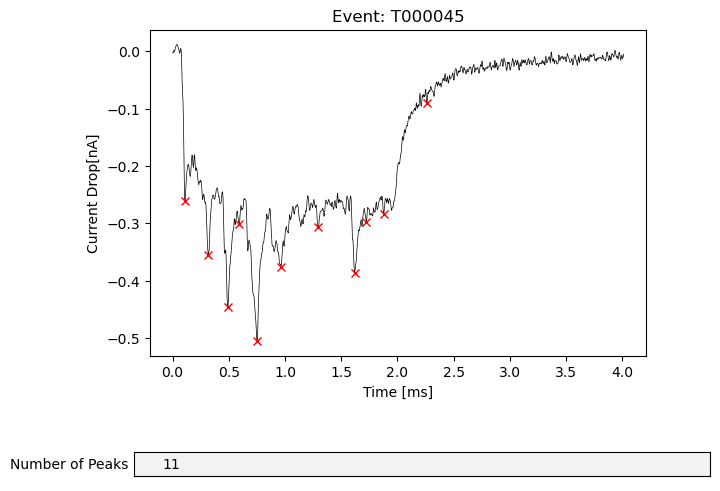

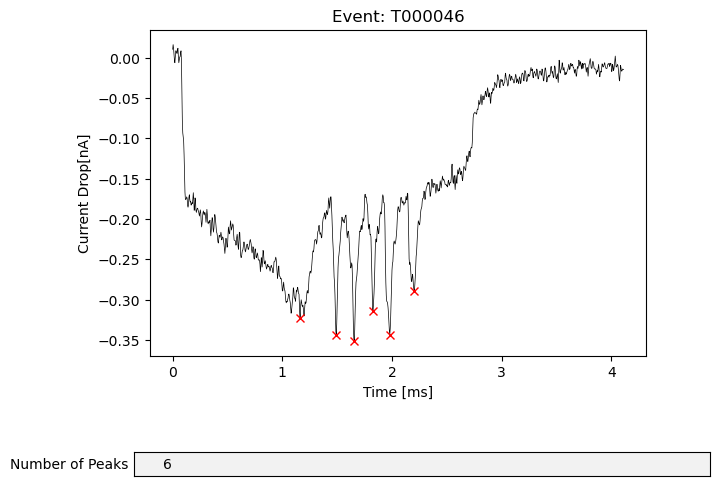

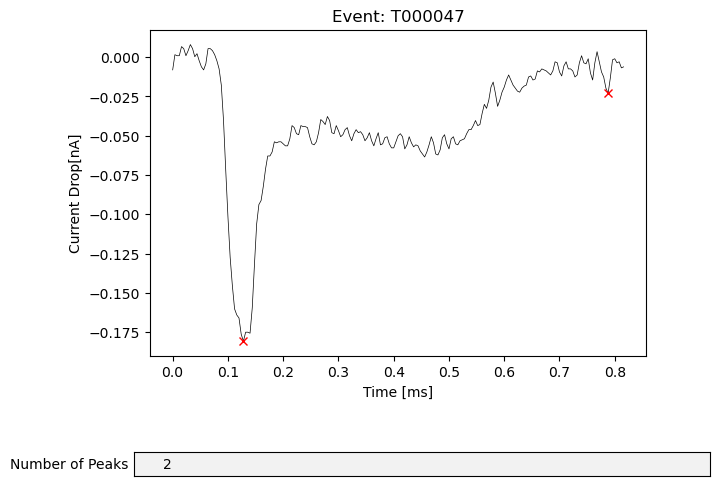

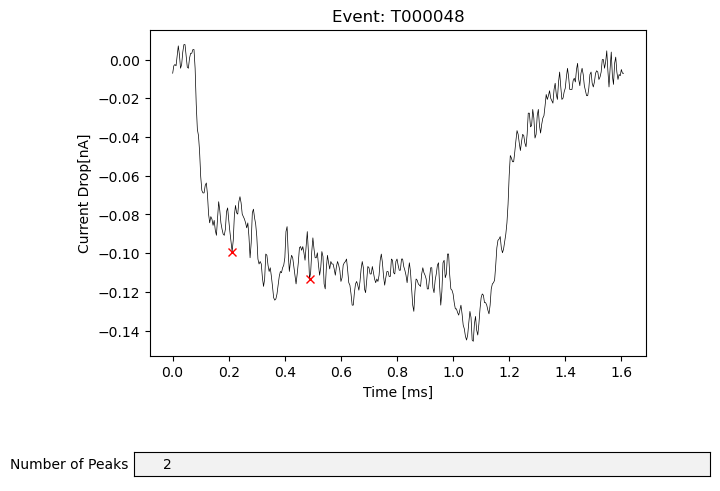

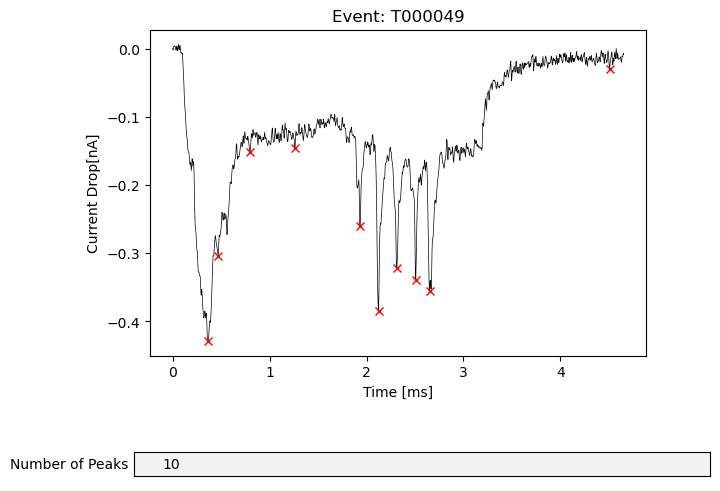

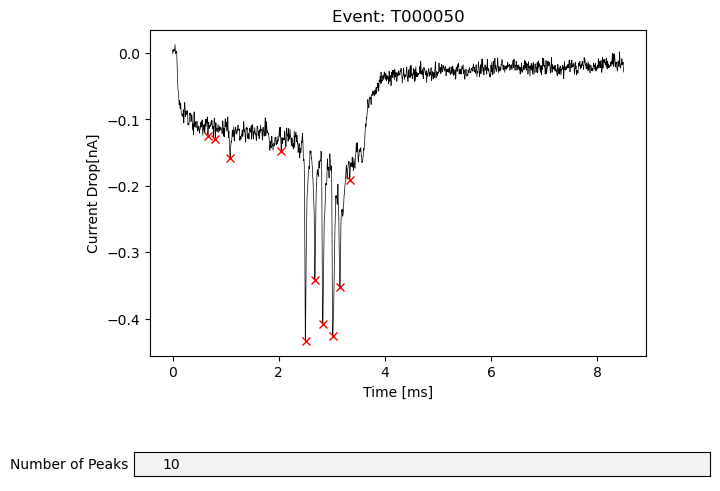

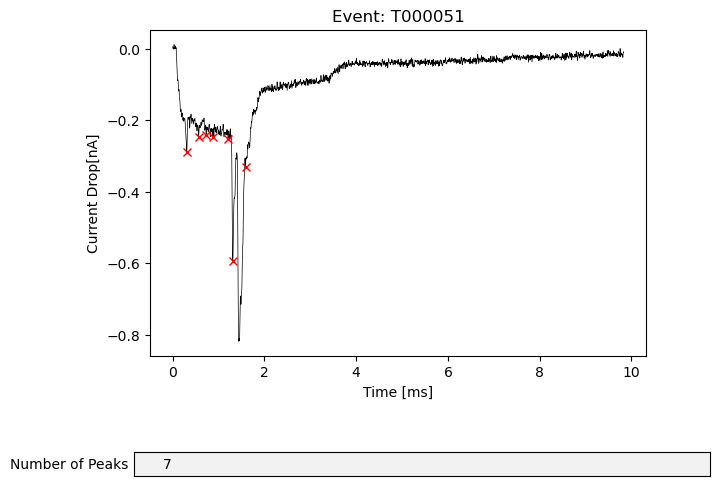

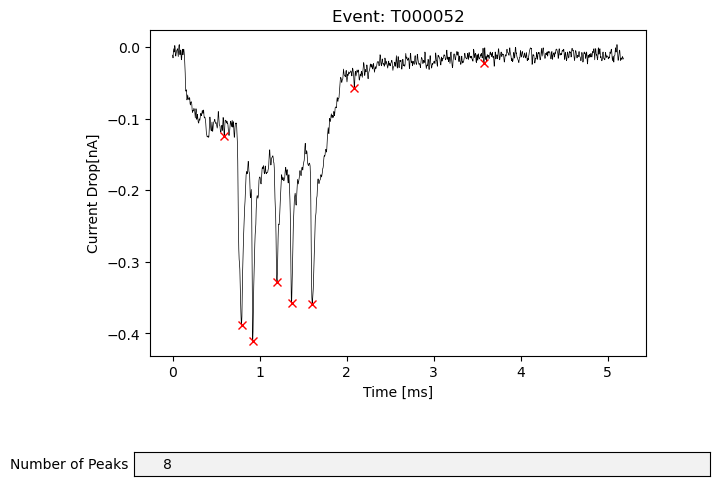

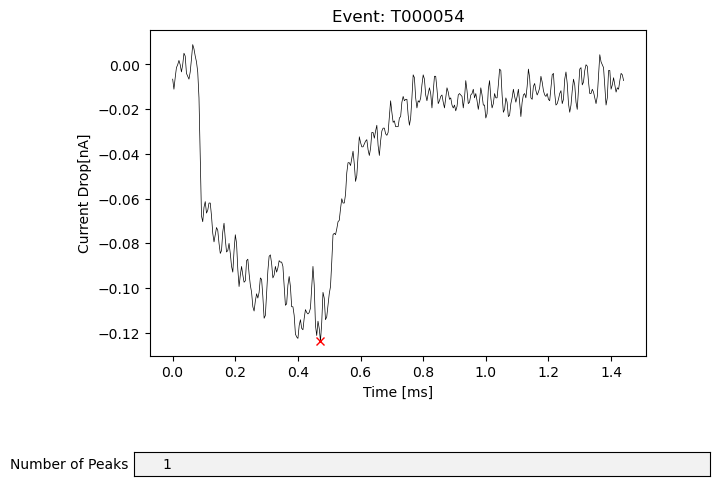

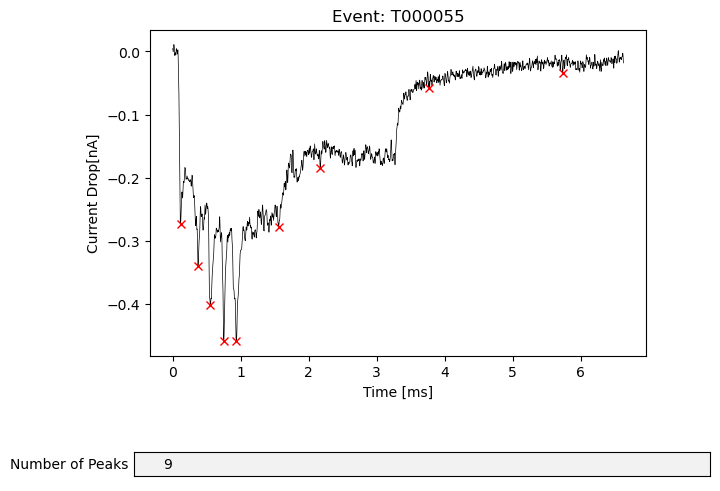

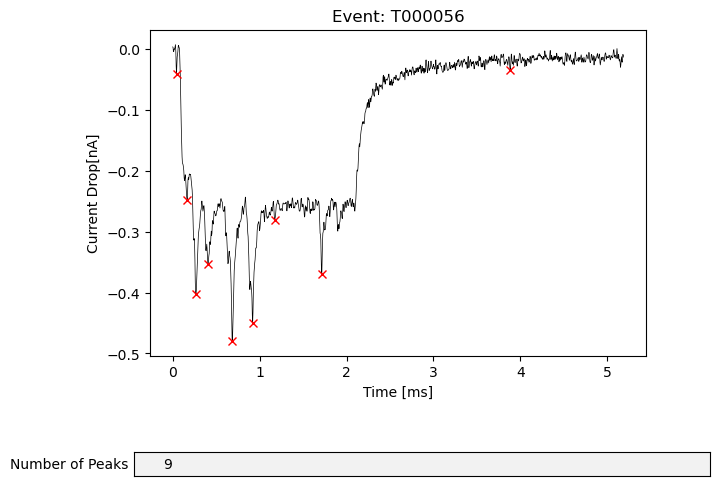

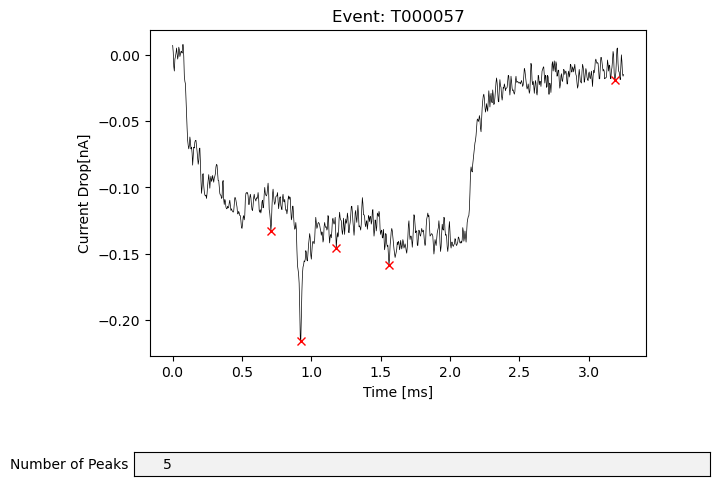

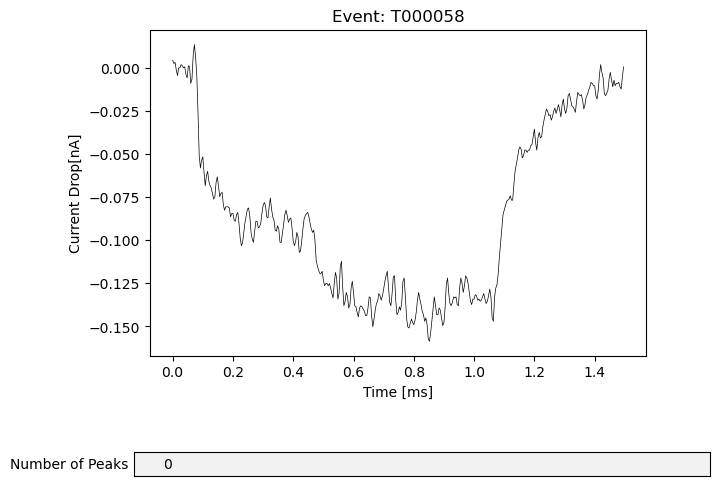

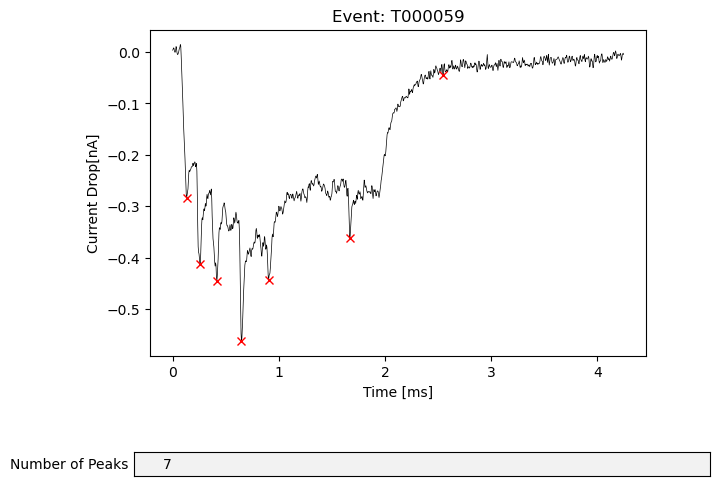

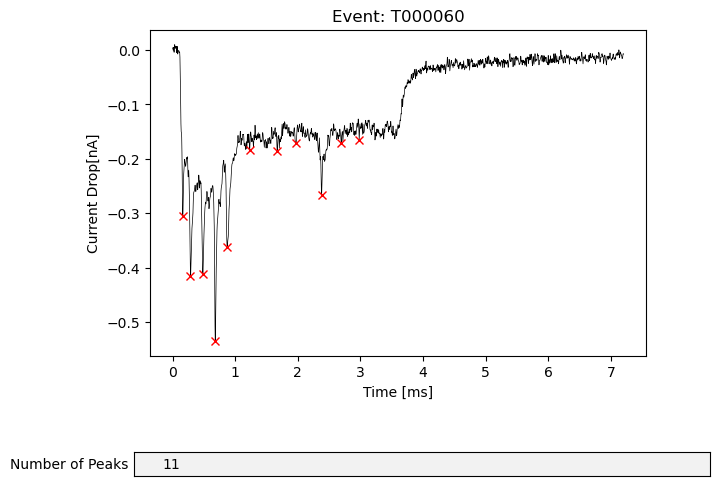

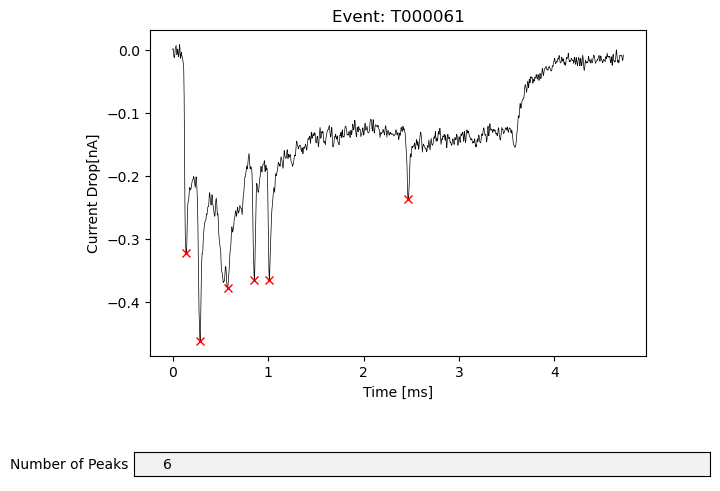

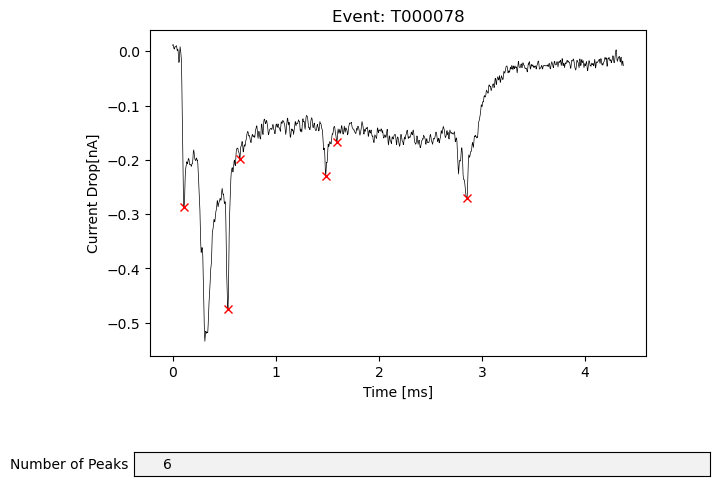

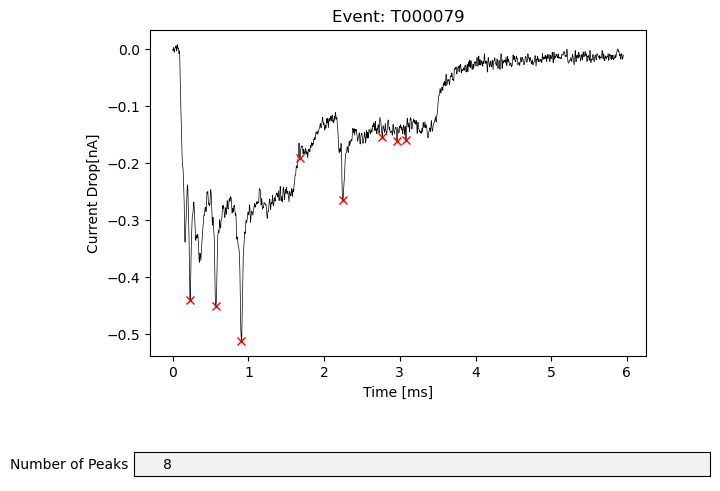

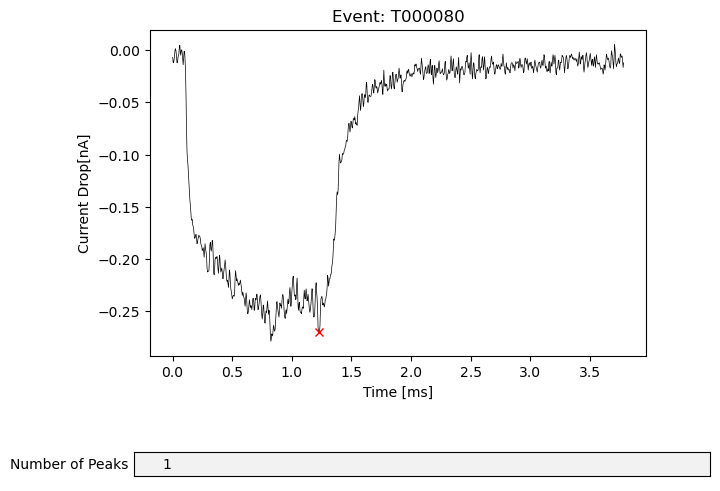

KeyboardInterrupt: 

In [91]:
Control = Nanopore(file="C:/Users/tm763/Documents/Nano_MRes/Mini_1/nanopore_analysis/TM_1_A_111_control_1")
Control.filter_noise()
#for event in Control.event_list_ln[0:10]:
#    Control.plot_one_event(event, peaks=False, print_heights=True)
Control.plot_events(ln=True)

In [65]:
Control.properties

AttributeError: 'Nanopore' object has no attribute 'properties'